In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("C:/Users/Admin/MLClassification_projects/Loan/loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


person_age: The age of the individual (numeric).
person_gender: Gender of the individual (e.g., female, male).
person_education: The highest level of education the individual has completed (e.g., High School, Bachelor, Master).
person_income: The annual income of the individual (numeric).
person_emp_exp: The years of employment experience the individual has (numeric).
person_home_ownership: Type of home ownership the person has (e.g., RENT, OWN, MORTGAGE).
loan_amnt: The amount of the loan applied for (numeric).
loan_intent: The intended purpose of the loan (e.g., PERSONAL, MEDICAL, EDUCATION).
loan_int_rate: The interest rate on the loan (numeric).
loan_percent_income: The loan amount as a percentage of the applicant’s income (numeric).
cb_person_cred_hist_length: The length of the person’s credit history (numeric).
credit_score: The credit score of the individual (numeric).
previous_loan_defaults_on_file: Indicates whether the person has defaulted on a previous loan (e.g., Yes or No).
loan_status: The status of the loan, whether it was approved or denied (0 = denied, 1 = approved).
Sample Data:

**DATA UNDERSTANDING**

In [6]:
# 1.info
# 2.columns
# 3. data understanding
# 4.nununiqe
# 5.unique,value count
# 6. sperate the data continous,discrete
# 7.describe
# 8.EDA
# 9.Data preprocessing


In [7]:
df.shape

(45000, 14)

person_age	  Age of the person	Float
person_gender	Gender of the person	Categorical
person_education	Highest education level	Categorical
person_income	Annual income	Float
person_emp_exp	Years of employment experience	Integer
person_home_ownership	Home ownership status (e.g., rent, own, mortgage)	Categorical
loan_amnt	Loan amount requested	Float
loan_intent	Purpose of the loan	Categorical
loan_int_rate	Loan interest rate	Float
loan_percent_income	Loan amount as a percentage of annual income	Float
cb_person_cred_hist_length	Length of credit history in years	Float
credit_score	Credit score of the person	Integer
previous_loan_defaults_on_file	Indicator of previous loan defaults	Categorical
loan_status (target variable)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [11]:
s=1
for i in df.columns.tolist():
    print(s,".",i,':','\n',df[i].unique(),'\n')
    s=s+1

1 . person_age : 
 [ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.] 

2 . person_gender : 
 ['female' 'male'] 

3 . person_education : 
 ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate'] 

4 . person_income : 
 [71948. 12282. 12438. ... 31924. 56942. 33164.] 

5 . person_emp_exp : 
 [  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85] 

6 . person_home_ownership : 
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

7 . loan_amnt : 
 [35000.  1000.  5500. ... 12229.  2771.  6665.] 

8 . loan_intent : 
 ['PERSONAL' 'EDUCATION' 'MEDICAL' 'V

In [12]:
#df.select_dtypes(include='object').columns

In [13]:
contnious=["person_age","person_income","loan_amnt","loan_int_rate","loan_percent_income",
          "credit_score"]
disceretCategorical=["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]
disceretCount=["loan_status","person_emp_exp","cb_person_cred_hist_length"]

In [14]:
for i in disceretCategorical:
    print(df[i].value_counts(),"\n")

person_gender
male      24841
female    20159
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 



In [15]:
df[contnious].describe()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,9583.157556,11.006606,0.139725,632.608756
std,6.045108,8.042250e+04,6314.886691,2.978808,0.087212,50.435865
min,20.000000,8.000000e+03,500.000000,5.420000,0.000000,390.000000
25%,24.000000,4.720400e+04,5000.000000,8.590000,0.070000,601.000000
50%,26.000000,6.704800e+04,8000.000000,11.010000,0.120000,640.000000
75%,30.000000,9.578925e+04,12237.250000,12.990000,0.190000,670.000000
max,144.000000,7.200766e+06,35000.000000,20.000000,0.660000,850.000000


In [16]:
df[disceretCategorical].describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [17]:
df[contnious].skew()

person_age              2.548154
person_income          34.137583
loan_amnt               1.179731
loan_int_rate           0.213784
loan_percent_income     1.034512
credit_score           -0.610261
dtype: float64

In [18]:
cr=df[contnious].corr()

**EDA**

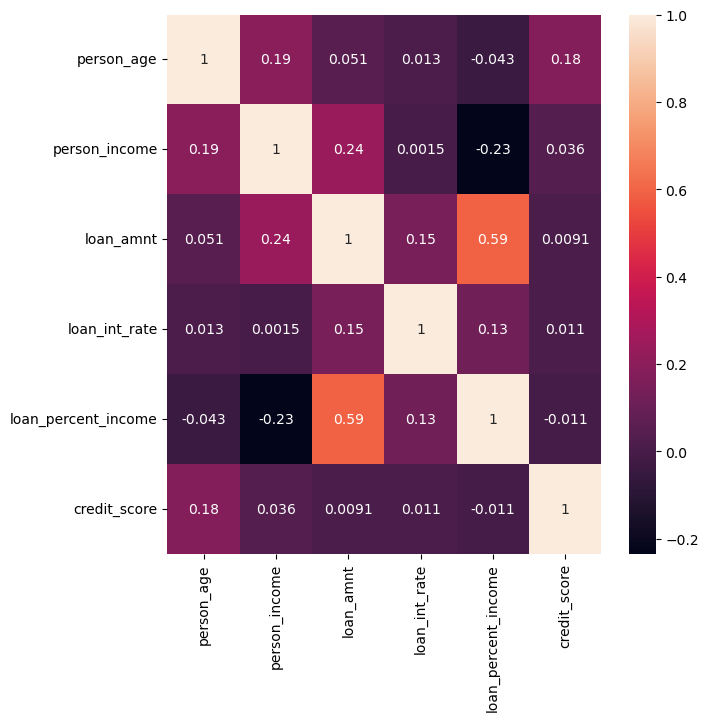

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(cr,annot=True)
plt.show()

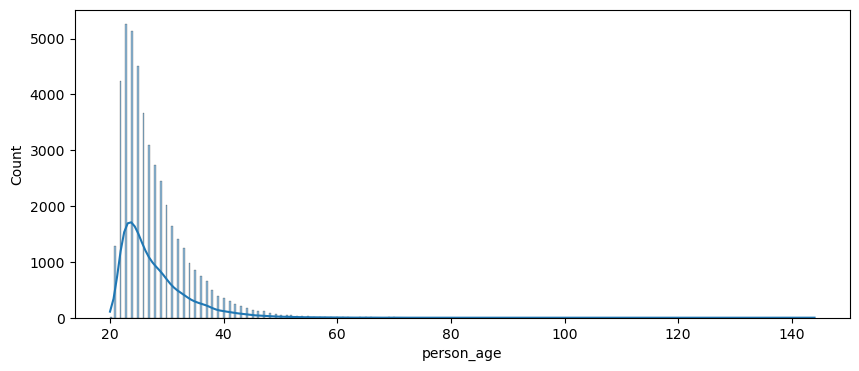

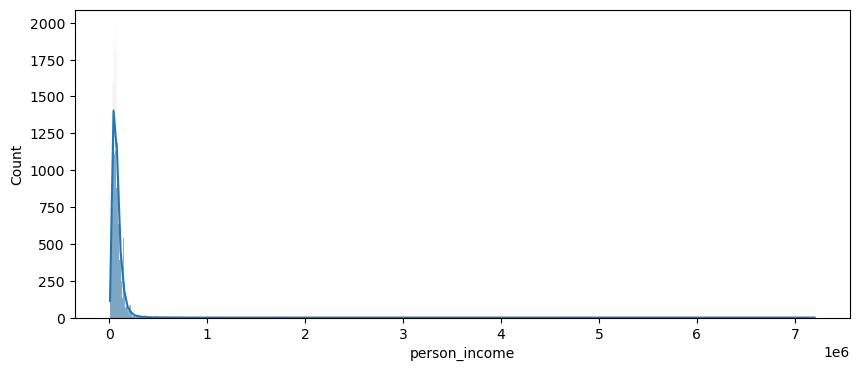

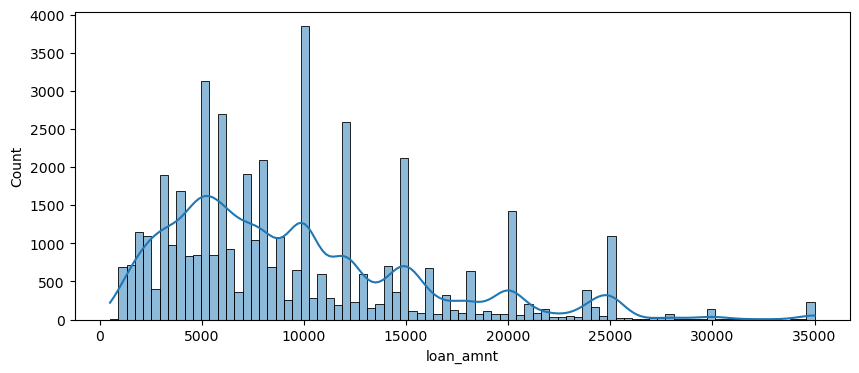

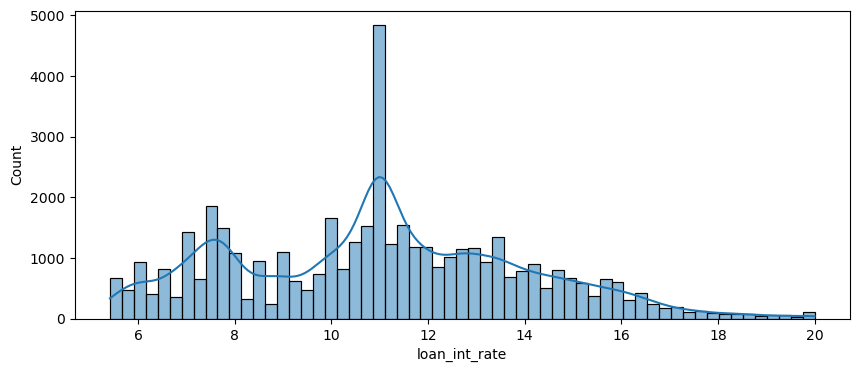

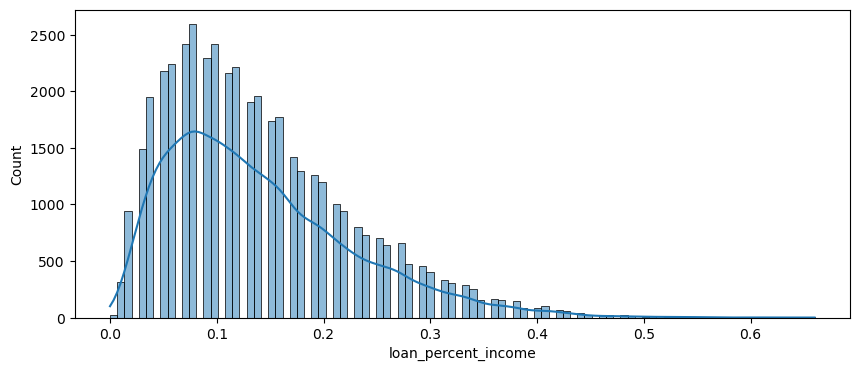

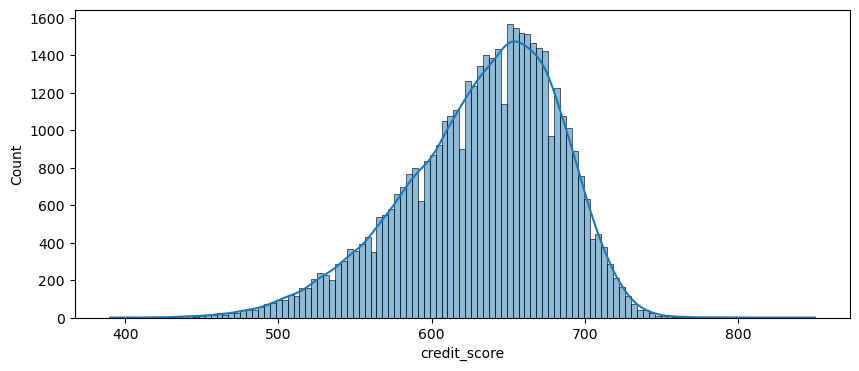

In [21]:
for i in contnious:
        plt.figure(figsize=(10,4))
        sns.histplot(df[i],kde=True)
        plt.show()

<Figure size 1000x1000 with 0 Axes>

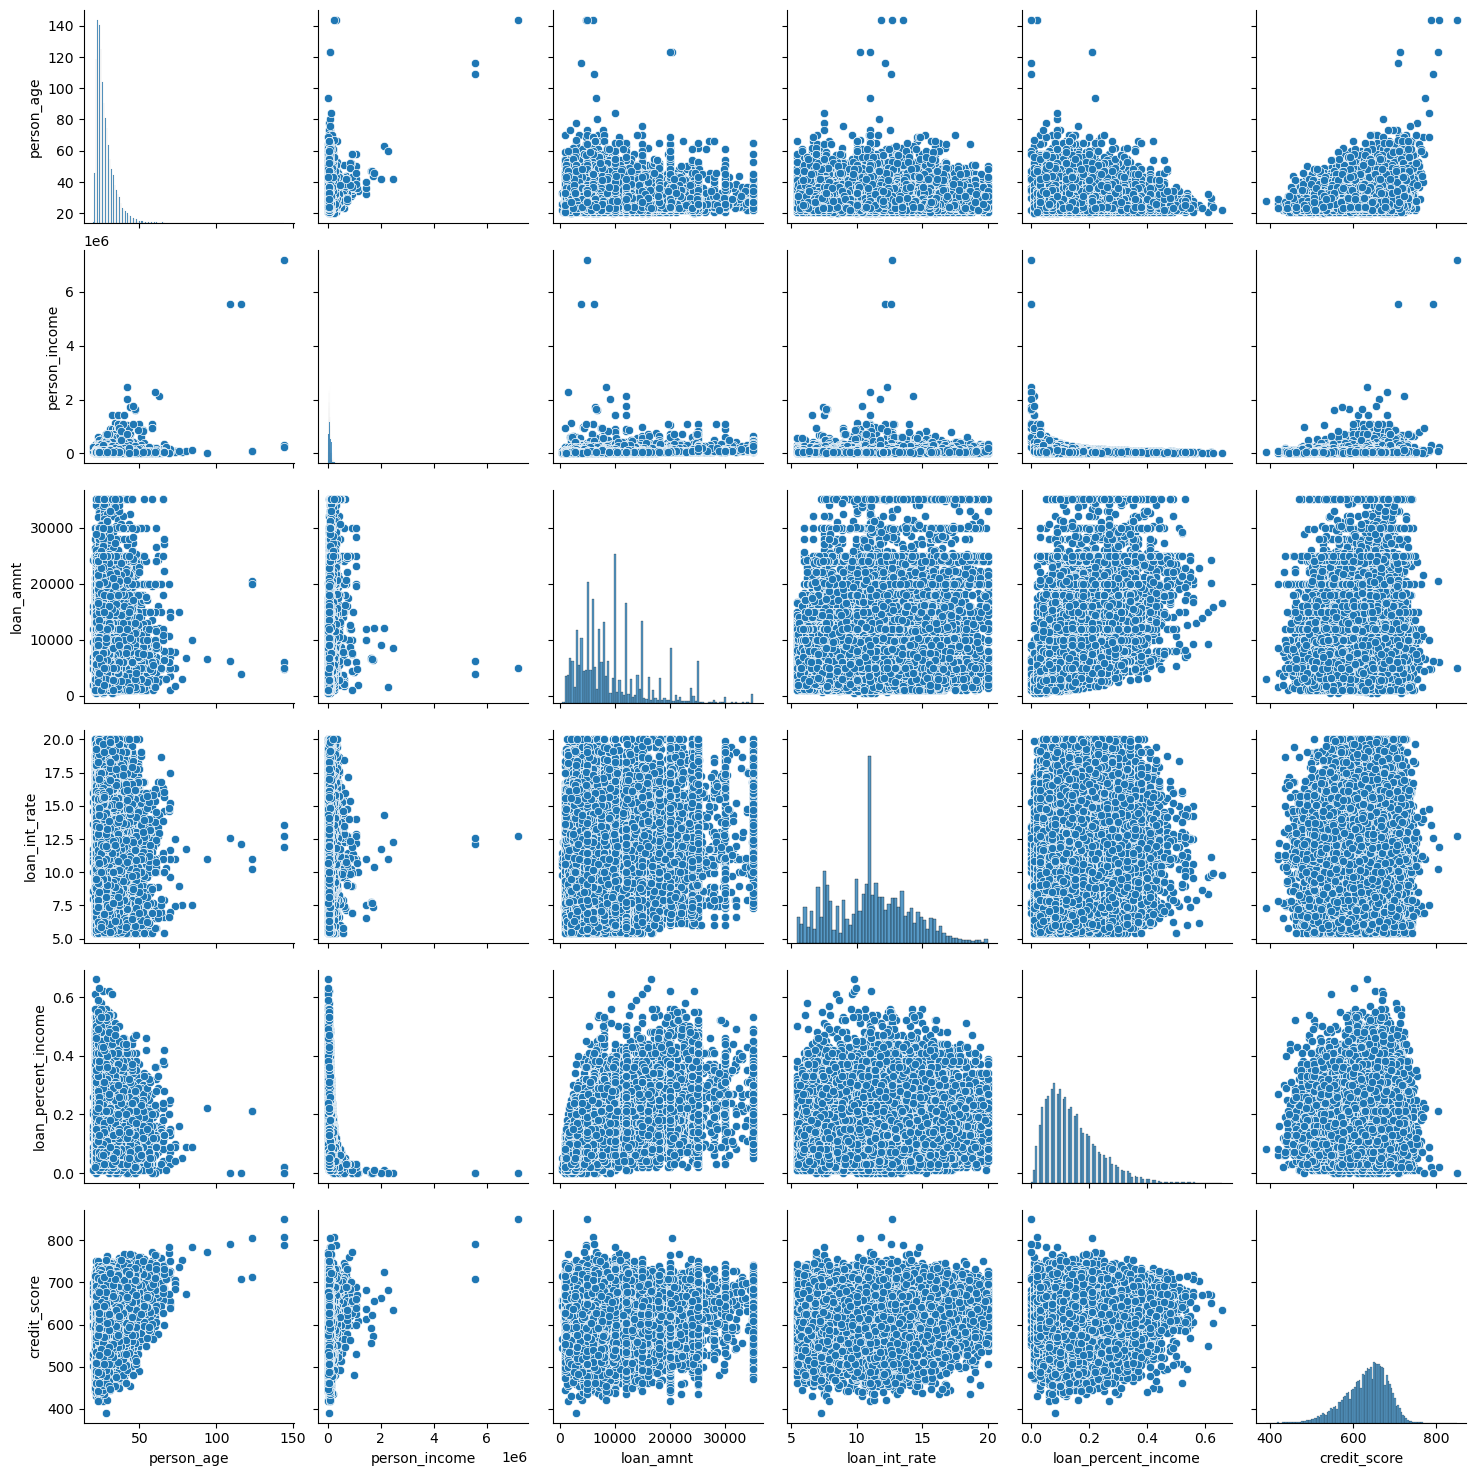

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(df[contnious])
plt.show()

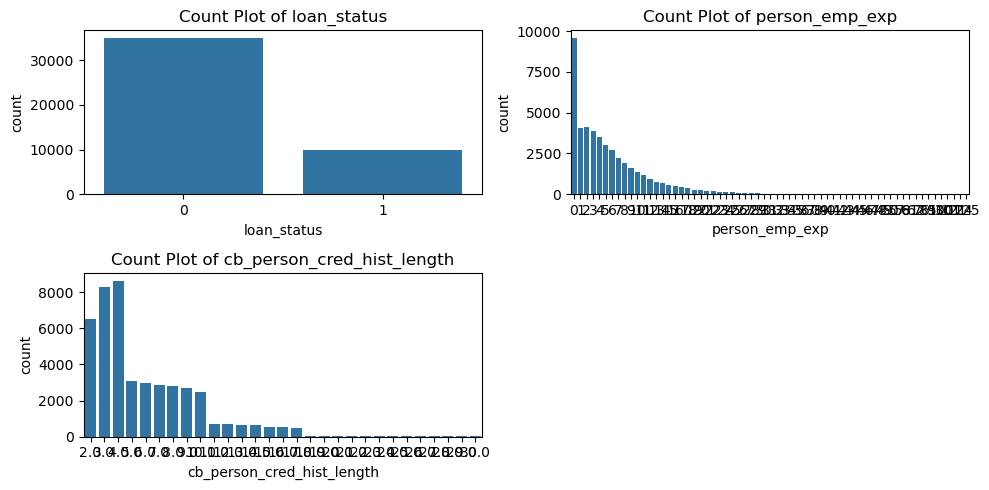

In [23]:
plt.figure(figsize=(10, 5))
for i, column in enumerate(disceretCount, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
plt.tight_layout()  
plt.show()


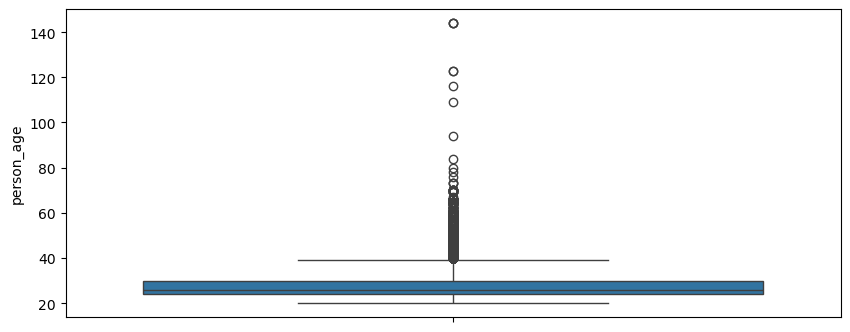

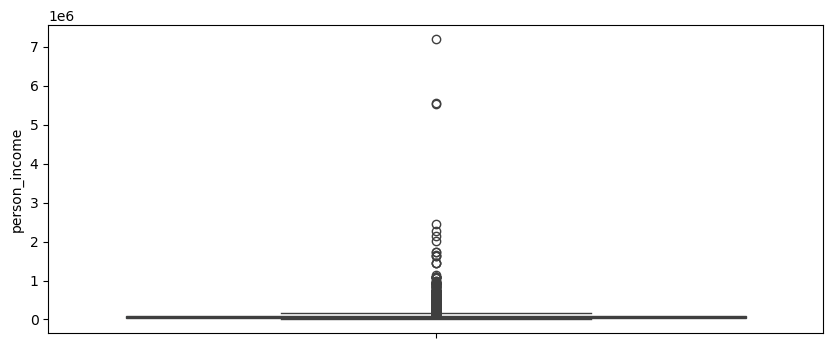

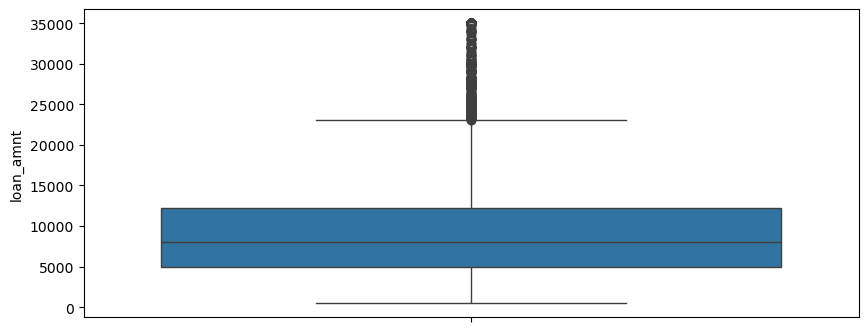

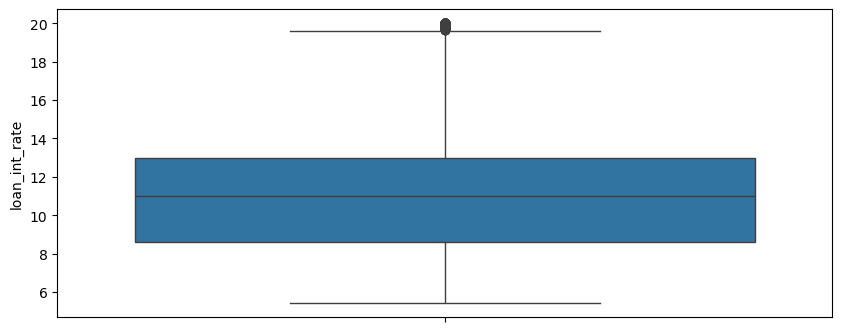

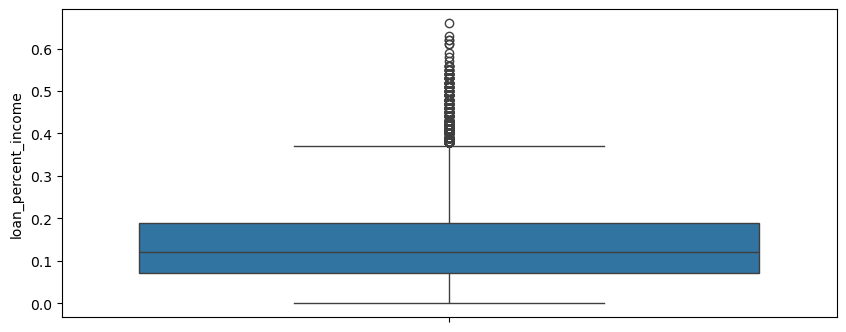

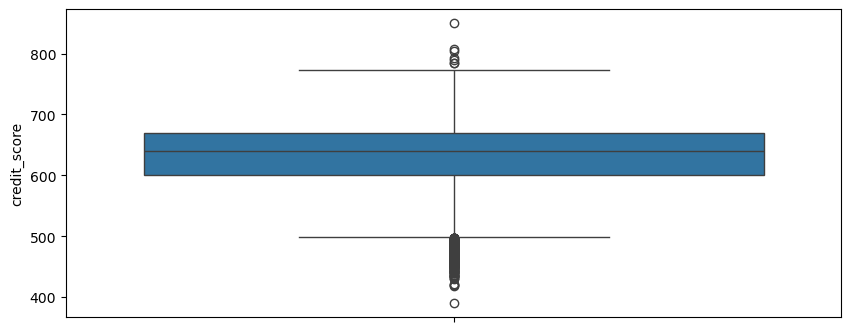

In [24]:
for i in contnious:
    plt.figure(figsize=(10,4))
    sns.boxplot(df[i])
    plt.show()

# **DATA PREPROCESSING**

**1.DATA CLEANING**

In [27]:
# Wrong DATA
df.drop(index=(df[df["person_age"]>120].index),axis=0,inplace=True)

In [28]:
#data type
df["person_age"]=df["person_age"].astype(int) 
df["cb_person_cred_hist_length"].astype(int)

0         3
1         2
2         3
3         2
4         4
         ..
44995     3
44996    11
44997    10
44998     6
44999     3
Name: cb_person_cred_hist_length, Length: 44995, dtype: int32

In [29]:
#no missing value

In [30]:
#outlier:retain

**2.ENCODING**

In [32]:
skewValue=df[contnious].skew()


In [33]:
lRskew=skewValue[(skewValue>1) | (skewValue<-1)]
lRskewList=lRskew.index.tolist()


In [35]:
from scipy.stats import boxcox
for i in lRskewList: 
    df[i],lmbda=boxcox(df[i]+1)

In [36]:
nominal=["person_gender","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]
ordinal=["person_education"]

In [37]:
df=pd.get_dummies(df,columns=nominal,drop_first=True)

In [38]:
df["person_education"].value_counts()

person_education
Bachelor       13397
Associate      12026
High School    11971
Master          6980
Doctorate        621
Name: count, dtype: int64

In [39]:
df["person_education"]=df["person_education"].map({"Bachelor":0,"Associate":1,"High School":2,
                           "Master":3,"Doctorate":4})

In [40]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [41]:
accuracy_train = []
CV = []

for i in range(1, 100):
    
  #Train Test Split
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
  
  # Standard Scaler
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train[contnious]=sc.fit_transform(X_train[contnious])
  X_test[contnious]=sc.transform(X_test[contnious])

  #Modelling
  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(random_state=True)
  model.fit(X_train, Y_train)

  #Prediction
  ypred_train = model.predict(X_train)

  #Evaluation
  from sklearn.metrics import accuracy_score
  accuracy_train.append(accuracy_score(Y_train,ypred_train))

  from sklearn.model_selection import cross_val_score
  CV.append(cross_val_score(model, X_train, Y_train, cv = 5, scoring = 'accuracy').mean())

data1 = pd.DataFrame({'accuracy_train' : accuracy_train, 'CV' : CV})
data2 = data1[abs(data1['accuracy_train'] - data1['CV']) <= 0.05]
data3 = data2[data2['CV'] == data2['CV'].max()]
rs = data3.index.tolist()[0]
rs

77

In [42]:
data3

,accuracy_train,CV
77,0.896961,0.896794


In [91]:
df.to_csv("CleanedLoanData.csv",index=False)